**Analysing Red Wine data set**

Importing required libraries.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

Reading the dataset.

In [100]:
df = pd.read_csv("/content/winequality-red.csv")

Displaying first 5 rows.

In [101]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Descriptive Statistics.

In [102]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking Data types.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data Preprocessing.

In [104]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Checking for null values.

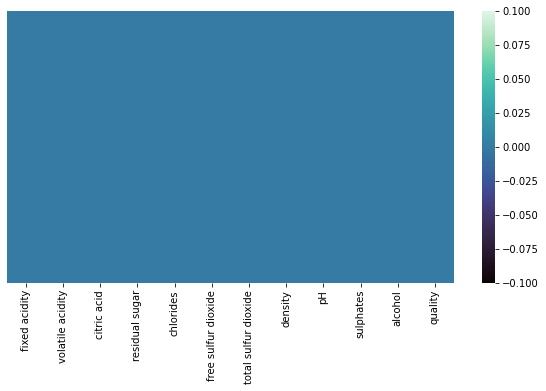

In [105]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='mako')

In [106]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*There are no null values present.*

Average wine simple data

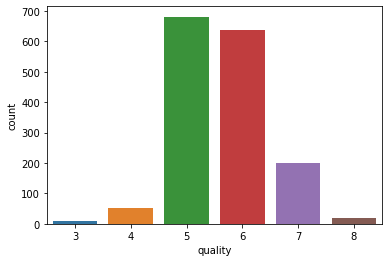

In [107]:
sns.countplot(x='quality',data=df)

Using swarmplot to see data distribution.

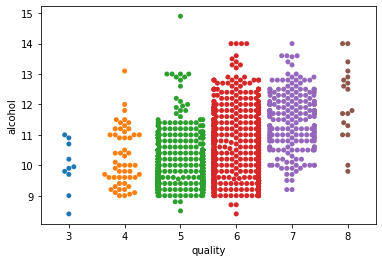

In [108]:
sns.swarmplot(x="quality",y="alcohol",data=df)

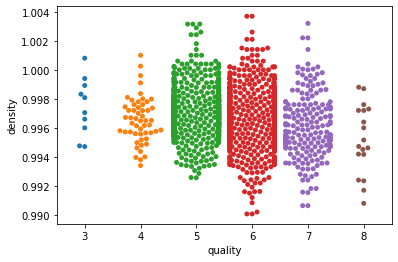

In [109]:
sns.swarmplot(x="quality",y="density",data=df)

Now, checking whether the data has outliers.

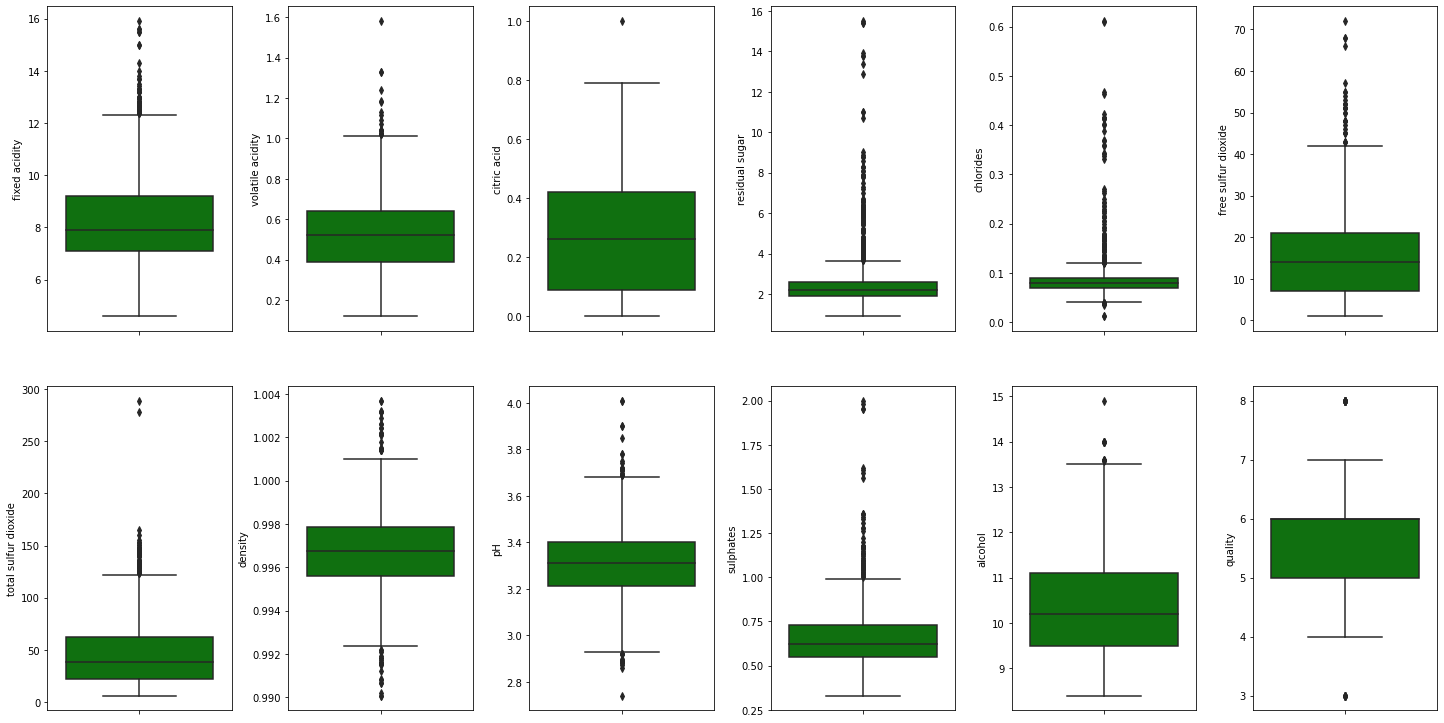

In [110]:

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Removing the outliers.

In [111]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col] 
        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

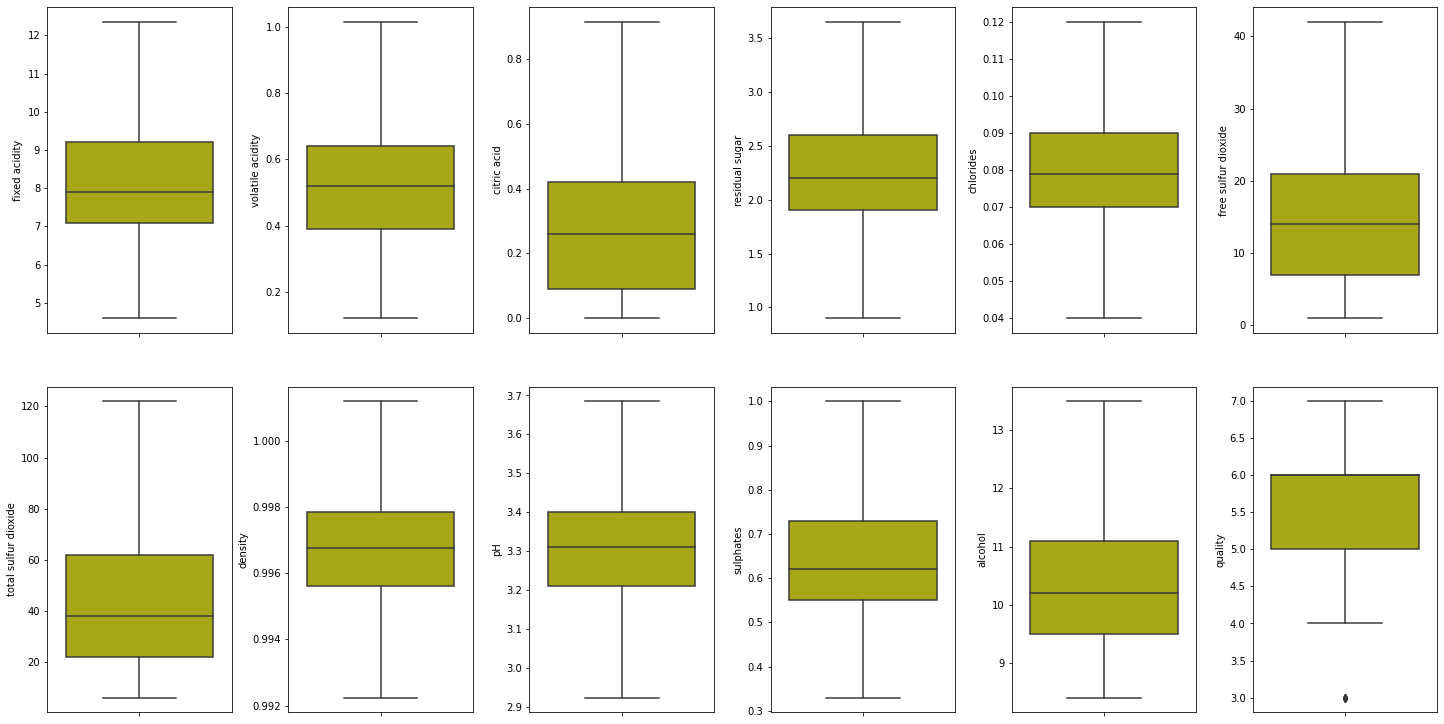

In [112]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='y', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

All outliers are removed.

Finding correlations.

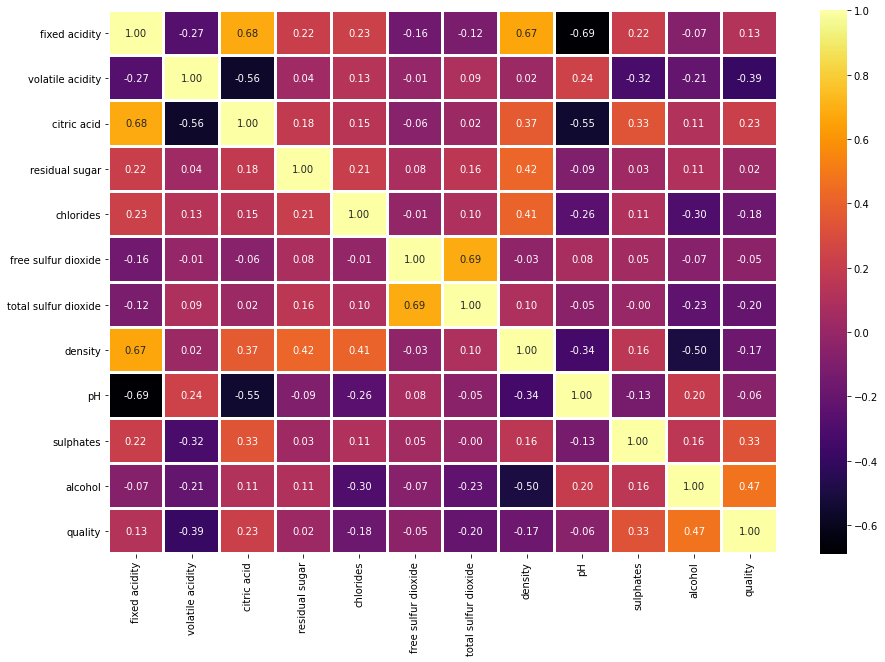

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2,cmap='inferno')

Conclusions from above figure:

* Alcohol is positively correlated with quality of red wine.
* Alcohol has a weak positive correlation with the pH value.

* Citric acid and density have a strong positive correlation with fixed acidity. 


* pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.








Distrbution of alcohol concentration with respect to quality of red wine.

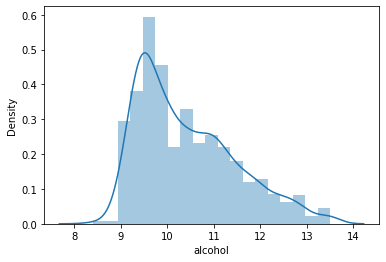

In [114]:
sns.distplot(df['alcohol'])

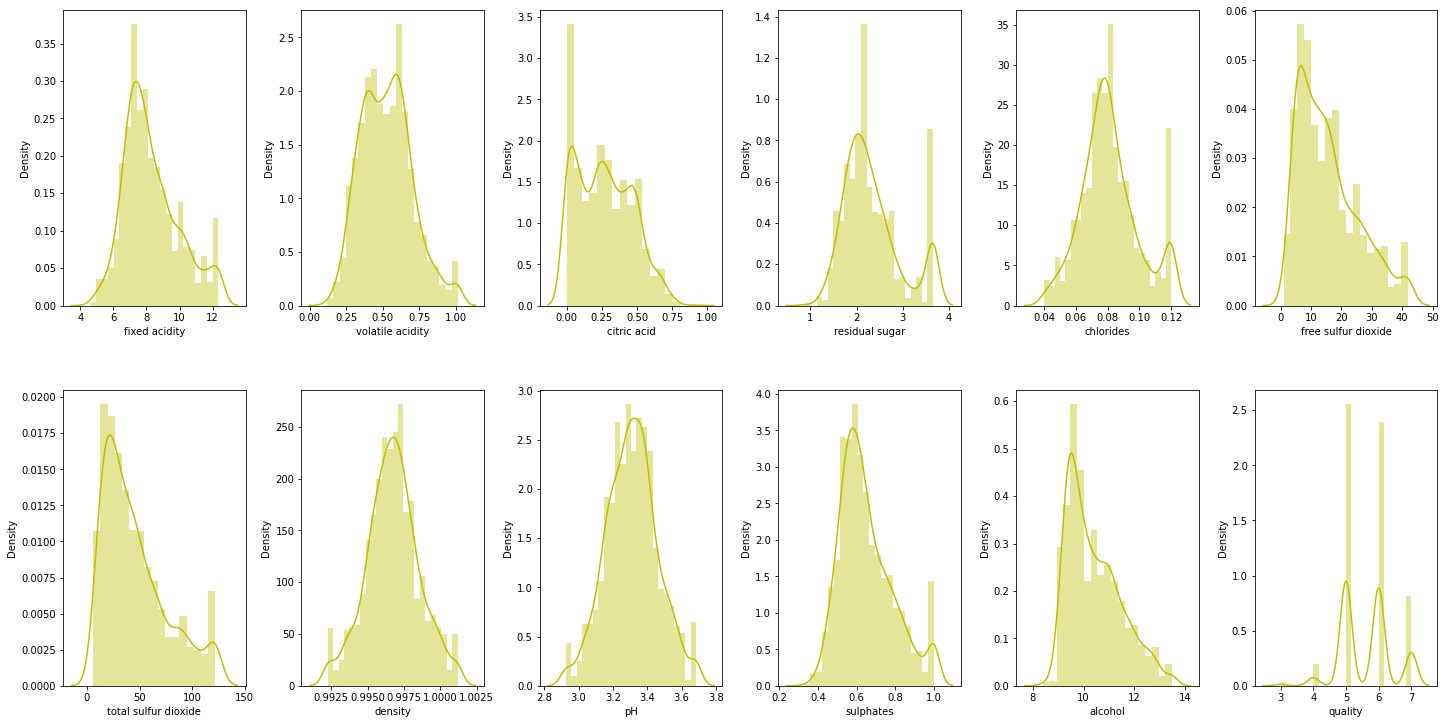

In [115]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, color='y', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

These figures show distribution of features.Few of them are normally distributed where other are rightly skewed.

<Figure size 864x432 with 0 Axes>

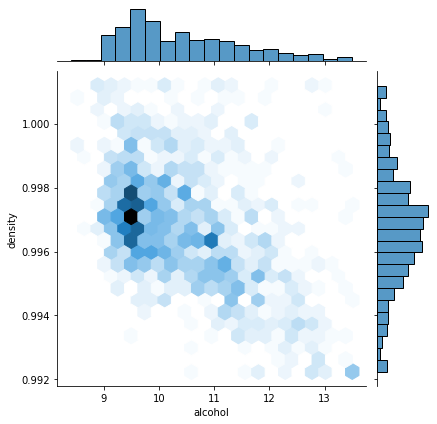

In [116]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex")

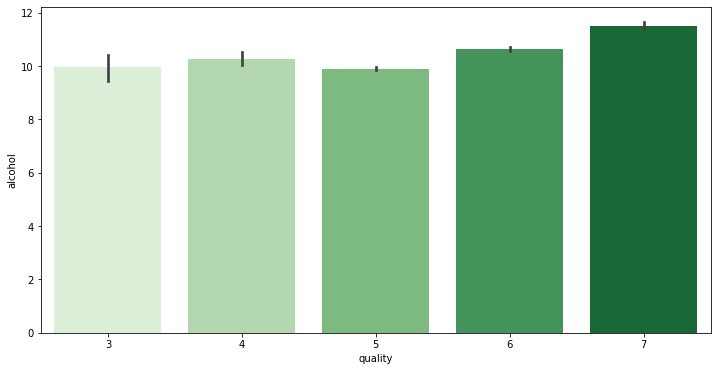

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Greens")

Alcohol Vs Quality boxplot

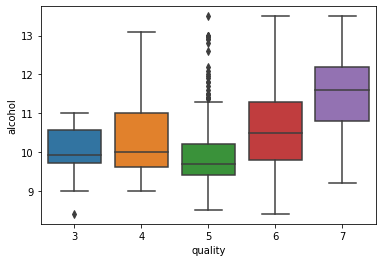

In [118]:
sns.boxplot(x='quality', y='alcohol', data = df)

There are outliers shown in the plot.We can remove the outliers by passing an argument, showoutliers=False

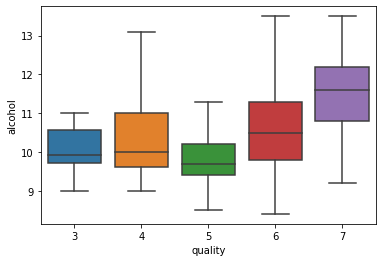

In [119]:
sns.boxplot(x='quality', y='alcohol', data = df, showfliers=False)


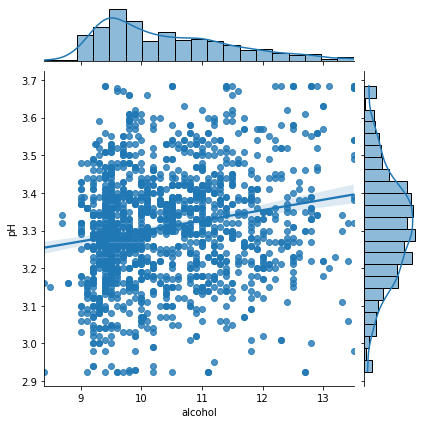

In [120]:
sns.jointplot(x='alcohol',y='pH',data=df, kind='reg')

This Figure shows that alcohol is weakly positively related to the pH values. Moreover, the regression line is depicted in the figure, illustrating the correlation between them.

**Model Development and Evaluation**

Importing model libraries.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


Handling Imbalanced Data

In [122]:
X = df.drop('quality', axis=1)
y = df['quality']


In [123]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X, y = oversample.fit_resample(X, y)

In [124]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

Decision Tree Classifier

In [125]:
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 77.11267605633803
CV Score: 69.83847283406755


*Here we have an accuracy of 76%*

Random Forest Classifier

In [97]:
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 84.85915492957746
CV Score: 78.14977973568283


*Here we have an accuracy of 84%*

Extra Trees Classfier

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 84.74178403755869
CV Score: 77.94419970631425


*Here we have an accuracy of 85%*